## CIVENG 263H - Final Project Code
### Data Cleaning + Normalization
#### Deadline: 12/13/2023
#### Team: Erin Jones, Breitling Snyder, Jon Atkins, Balaji Balagesenan

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import skew

First - Determine the best method for scaling the remaining features
* standard scaling - data is normally distributed (use StandardScaler)
* min max - data is not normally distributed (use MinMaxScaler)
* robust scaling - lots of outliers (RobustScaler)
* normalization - interested in direction but don't care about the length

In [2]:
# List of 34 rows selected from the raw dataset
original_columns_list = ['fips5',
                        'ox__drive__streets_per_node_avg', 
                        'ox__drive__circuity_avg', 
                        'ox__drive__self_loop_proportion', 
                        'ox__drive__street_density_km', 
                        'ox__drive__clean_intersection_density_km', 
                        'ox__drive__avg_clust',
                        'ox__bike__streets_per_node_avg',
                        'ox__bike__circuity_avg',
                        'ox__bike__self_loop_proportion',
                        'ox__bike__street_density_km',
                        'ox__bike__clean_intersection_density_km',
                        'ox__bike__avg_clust',
                        'ox__bike_drive_ratio',
                        'ox__train_drive_ratio',
                        'demog__pop__total',
                        'demog__pop__density',
                        'demog__pop_white__share',
                        'demog__pop_afam__share',
                        'demog__pop_latino__share',
                        'demog__edu_bachelor__share',
                        'demog__hh_income_12mo__median',
                        'housing__rent_burden__median',
                        'housing__2plus_units__share',
                        'housing__rent__share',
                        'housing__has_under18__share',
                        'commute_mode__drive__share',
                        'commute_mode__carpool__share',
                        'commute_mode__transit__share',
                        'commute_traveltime__all__mean',
                        'commute__work_in_county__share',
                        'veh_available__none__share',
                        'veh_available__veh_per_hh',
                        'area__sqkm',
                        'kgco2_2017']

# import df
df = pd.read_csv('./data/combined_dataset_raw.csv')

In [3]:
# Rename
rename_mapping = {'ox__drive__streets_per_node_avg': 'dr_str_per_node', 
               'ox__drive__circuity_avg': 'dr_circuity', 
               'ox__drive__self_loop_proportion': 'dr_self_loop', 
               'ox__drive__street_density_km': 'dr_str_density', 
               'ox__drive__clean_intersection_density_km': 'dr_clean_int_density', 
               'ox__drive__avg_clust': 'dr_avg_cluster',
               'ox__bike__streets_per_node_avg': 'bk_str_per_node',
               'ox__bike__circuity_avg': 'bk_circuity',
               'ox__bike__self_loop_proportion': 'bk_self_loop',
               'ox__bike__street_density_km': 'bk_str_density',
               'ox__bike__clean_intersection_density_km': 'bk_clean_int_desnity',
               'ox__bike__avg_clust': 'bk_avg_cluster',
               'ox__bike_drive_ratio': 'bk_dr_ratio',
               'ox__train_drive_ratio': 'tr_dr_ratio',
               'demog__pop__total': 'total_pop',
               'demog__pop__density': 'pop_density',
               'demog__pop_white__share': 'pop_white',
               'demog__pop_afam__share': 'pop_black',
               'demog__pop_latino__share': 'pop_latin',
               'demog__edu_bachelor__share': 'edu_bachelor',
               'demog__hh_income_12mo__median': 'hh_income_median',
               'housing__rent_burden__median': 'rent_burden_median',
               'housing__2plus_units__share': 'two_plus_units',
               'housing__rent__share': 'renters',
               'housing__has_under18__share': 'under_18',
               'commute_mode__drive__share': 'cmute_drive',
               'commute_mode__carpool__share': 'cmute_carpool',
               'commute_mode__transit__share': 'cmute_transit',
               'commute_traveltime__all__mean': 'cmute_travel_time',
               'commute__work_in_county__share': 'cmute_work_in_county',
               'veh_available__none__share': 'no_vehicle',
               'veh_available__veh_per_hh': 'n_vehicle_avail',
               'area__sqkm': 'area_sqkm',
               'kgco2_2017': 'kgco2_sum'}

In [4]:
master_df = df.loc[:,original_columns_list]
master_df.rename(columns=rename_mapping, inplace=True)
master_df['emissions_per_cap'] = master_df['kgco2_sum']/master_df['total_pop']
master_df.head(1)

,fips5,dr_str_per_node,dr_circuity,dr_self_loop,dr_str_density,dr_clean_int_density,dr_avg_cluster,bk_str_per_node,bk_circuity,bk_self_loop,...,cmute_drive,cmute_carpool,cmute_transit,cmute_travel_time,cmute_work_in_county,no_vehicle,n_vehicle_avail,area_sqkm,kgco2_sum,emissions_per_cap
0,51027,2.070245,1.27956,0.003559,1827.571566,2.144036,0.16498,NaN,NaN,NaN,...,0.87132,0.074962,0.005918,33.186,0.754,0.022,2.297465,1304.447459,8.397231e+07,3713.78136


### Investigate NaN

In [5]:
print(master_df.shape)
master_df.isna().sum()

(3040, 36)


fips5                      0
dr_str_per_node            0
dr_circuity                0
dr_self_loop               0
dr_str_density             0
dr_clean_int_density       0
dr_avg_cluster             0
bk_str_per_node          351
bk_circuity              351
bk_self_loop             351
bk_str_density           351
bk_clean_int_desnity     351
bk_avg_cluster           351
bk_dr_ratio              351
tr_dr_ratio             3012
total_pop                  0
pop_density                0
pop_white                  0
pop_black                  0
pop_latin                  0
edu_bachelor               0
hh_income_median           0
rent_burden_median         1
two_plus_units             0
renters                    0
under_18                   0
cmute_drive                0
cmute_carpool              0
cmute_transit              0
cmute_travel_time          0
cmute_work_in_county       0
no_vehicle                 0
n_vehicle_avail            0
area_sqkm                  0
kgco2_sum     

* Definitely just dropping the train/drive ratio >> this is a limitation as it was our only 'trains' datapoint but there is hardly any data there
* We are trying to simplify our future analyses and want to be able to better manually interpret our results -- as such, I am making the executive decision to remove the 351 counties missing bike info + the one missing the average median

In [6]:
master_df.drop(columns='tr_dr_ratio', inplace=True)
master_df.dropna(how='any', inplace=True)
master_df.isna().sum()

fips5                   0
dr_str_per_node         0
dr_circuity             0
dr_self_loop            0
dr_str_density          0
dr_clean_int_density    0
dr_avg_cluster          0
bk_str_per_node         0
bk_circuity             0
bk_self_loop            0
bk_str_density          0
bk_clean_int_desnity    0
bk_avg_cluster          0
bk_dr_ratio             0
total_pop               0
pop_density             0
pop_white               0
pop_black               0
pop_latin               0
edu_bachelor            0
hh_income_median        0
rent_burden_median      0
two_plus_units          0
renters                 0
under_18                0
cmute_drive             0
cmute_carpool           0
cmute_transit           0
cmute_travel_time       0
cmute_work_in_county    0
no_vehicle              0
n_vehicle_avail         0
area_sqkm               0
kgco2_sum               0
emissions_per_cap       0
dtype: int64

In [7]:
master_df.shape

(2688, 35)

### Find best scaling method by examining the distributions

In [8]:
def plot_histogram_and_boxplot(df, column_title):
    # Extract the column data
    data = df[column_title]

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram on the first subplot
    ax1.hist(data, bins=20, color='skyblue', edgecolor='black')
    ax1.set_title(f'Histogram of {column_title}')
    ax1.set_xlabel(column_title)
    ax1.set_ylabel('Frequency')

    # Boxplot on the second subplot
    ax2.boxplot(data, vert=False, patch_artist=True)
    ax2.set_title(f'Boxplot of {column_title}')
    ax2.set_xlabel(column_title)

    # Display the plots
    plt.tight_layout()
    return plt.show()

In [9]:
# create df w/o fips that can be mapped to the original
master_wo_code = master_df.iloc[:,1:]

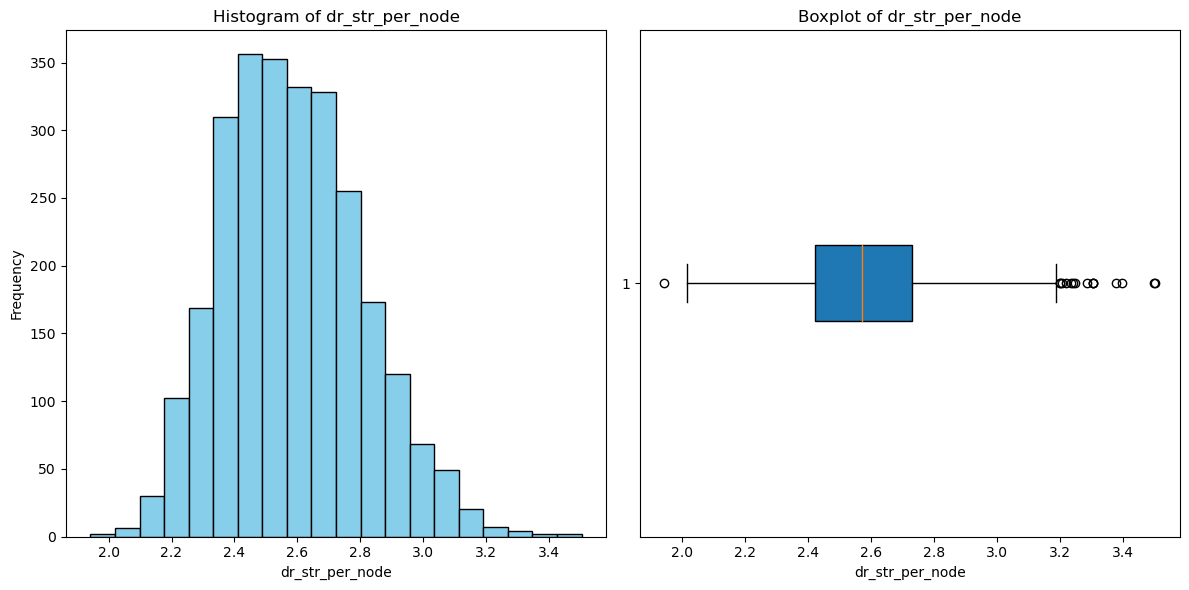

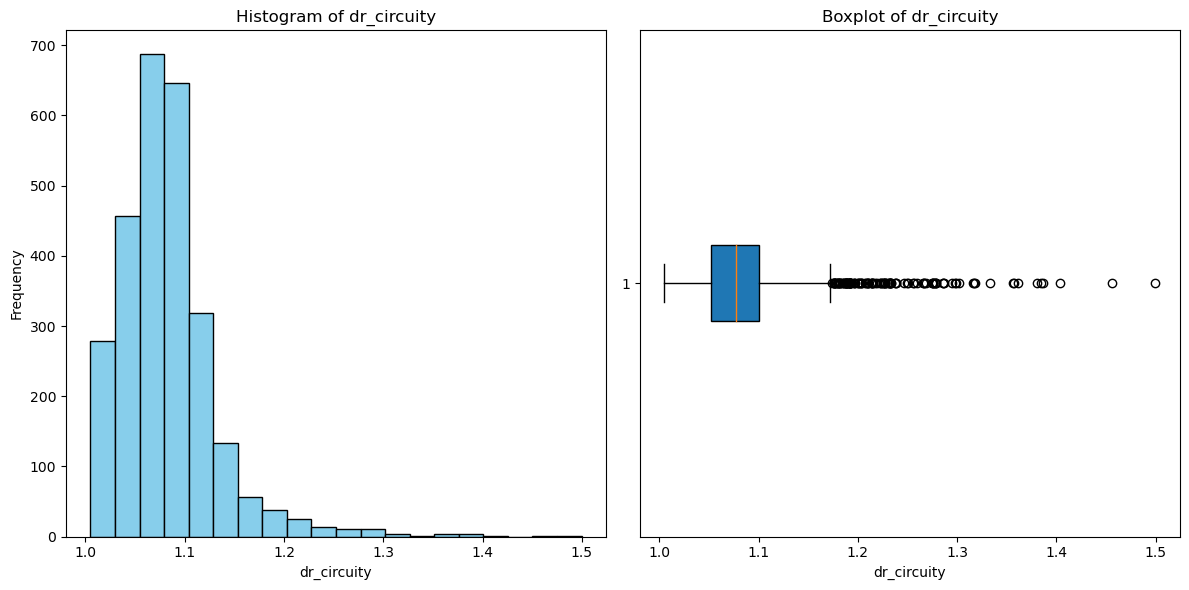

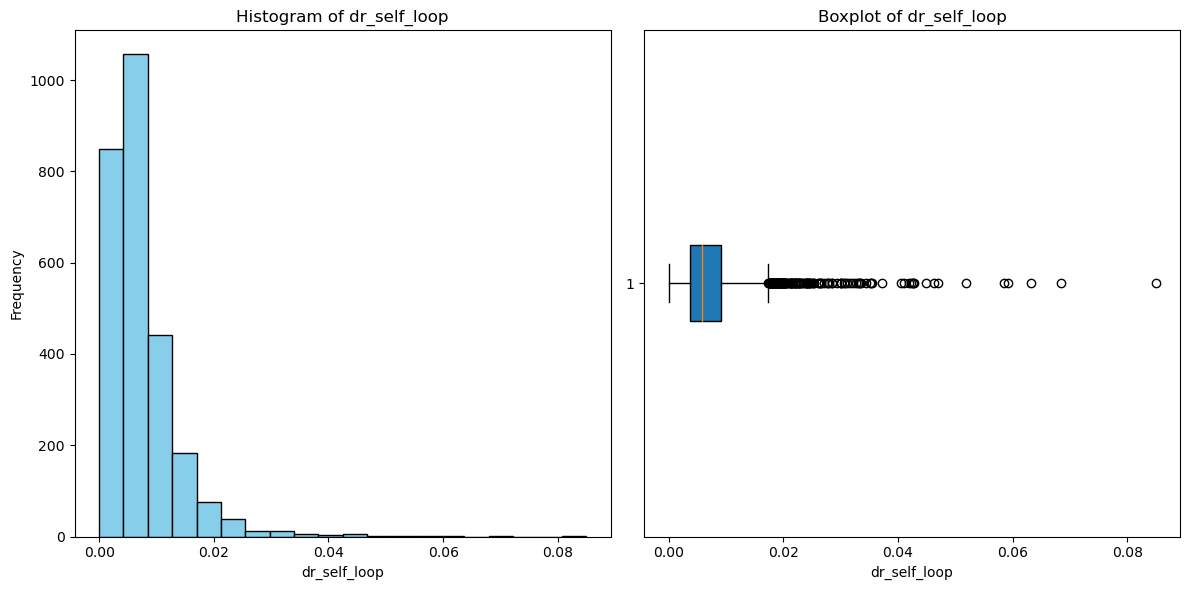

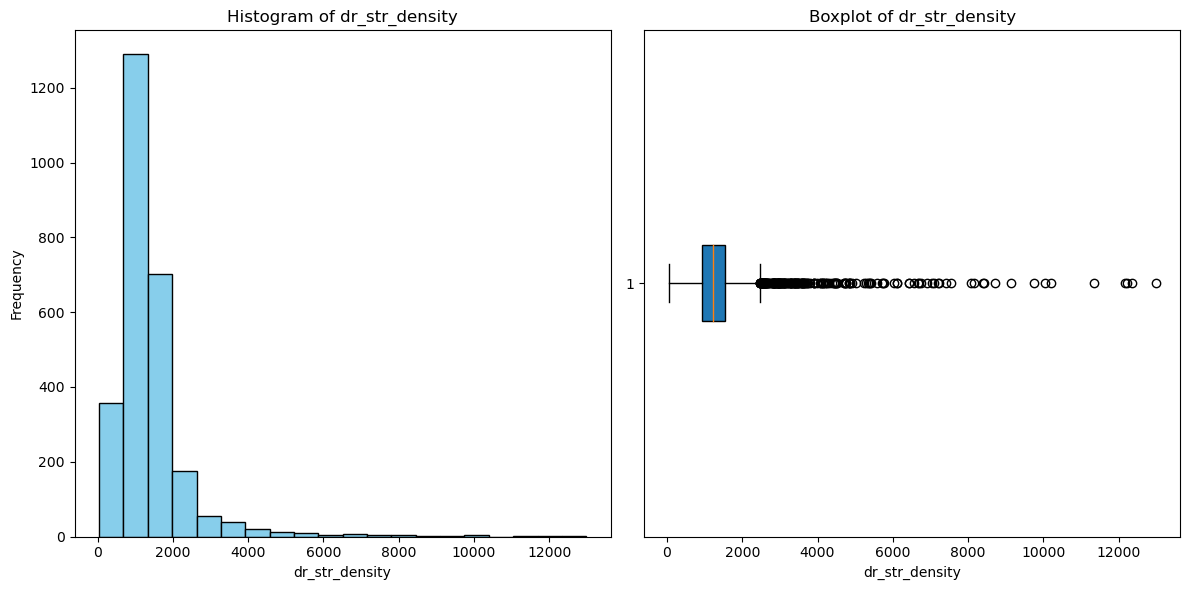

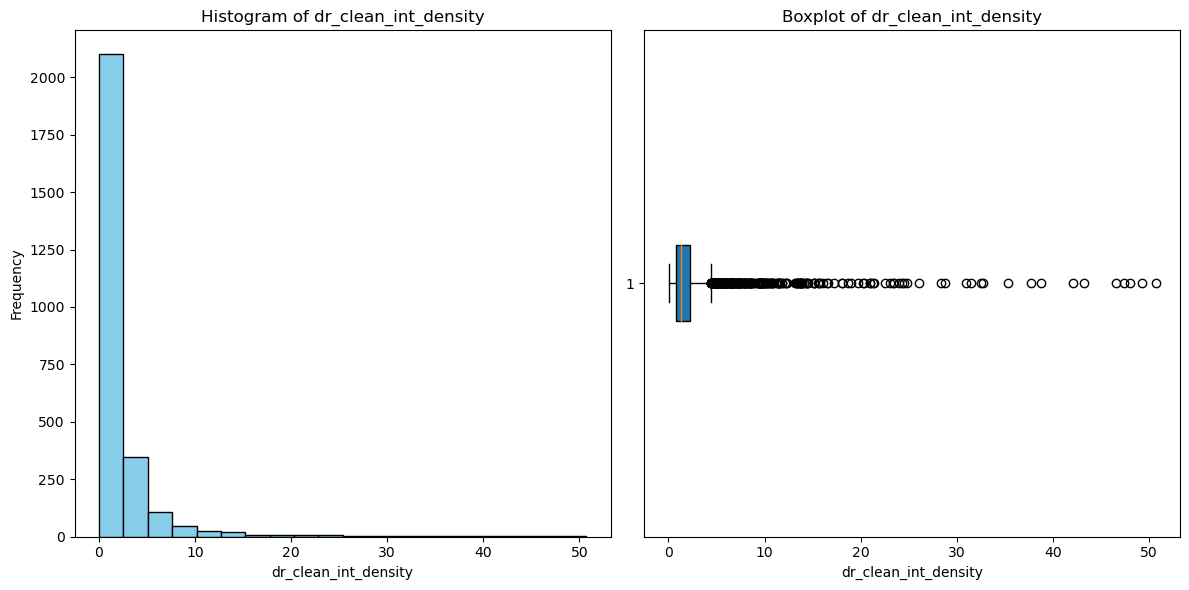

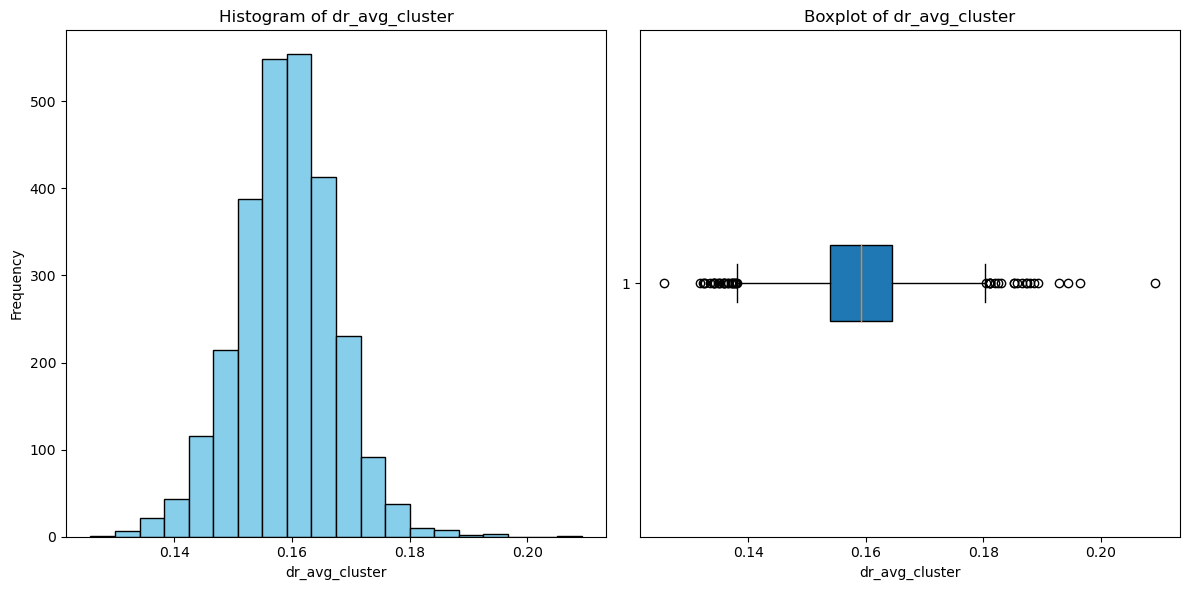

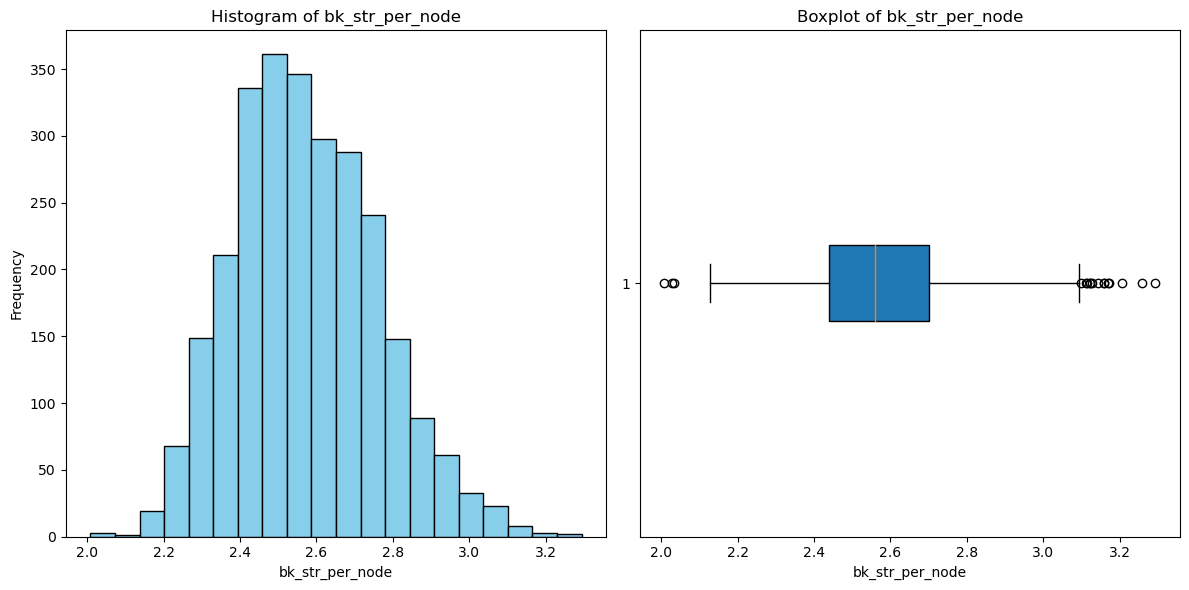

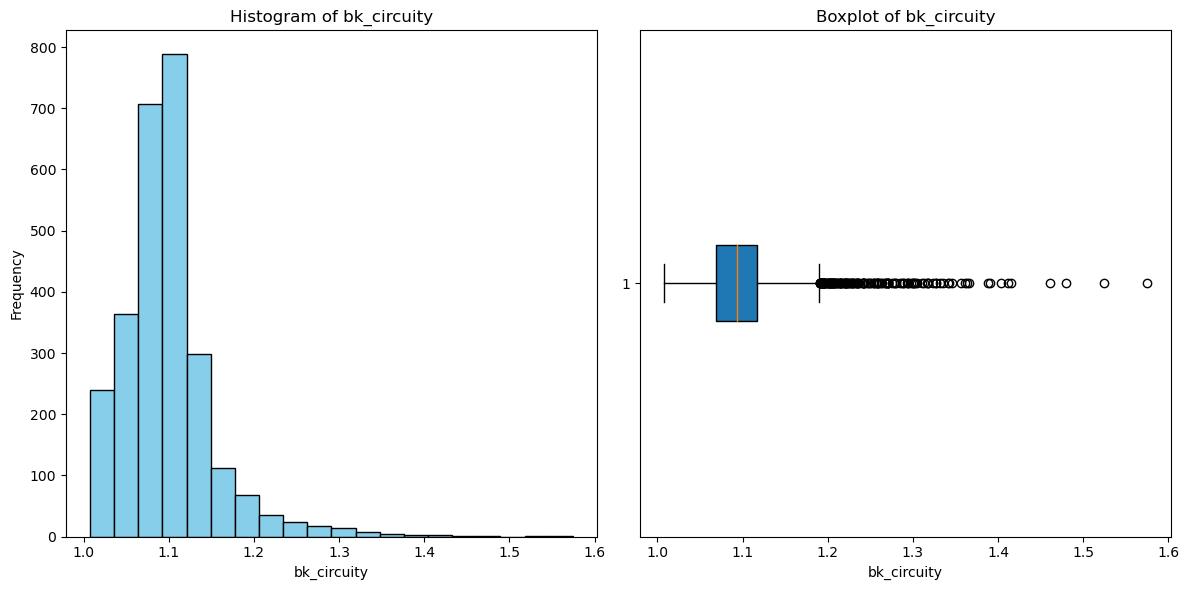

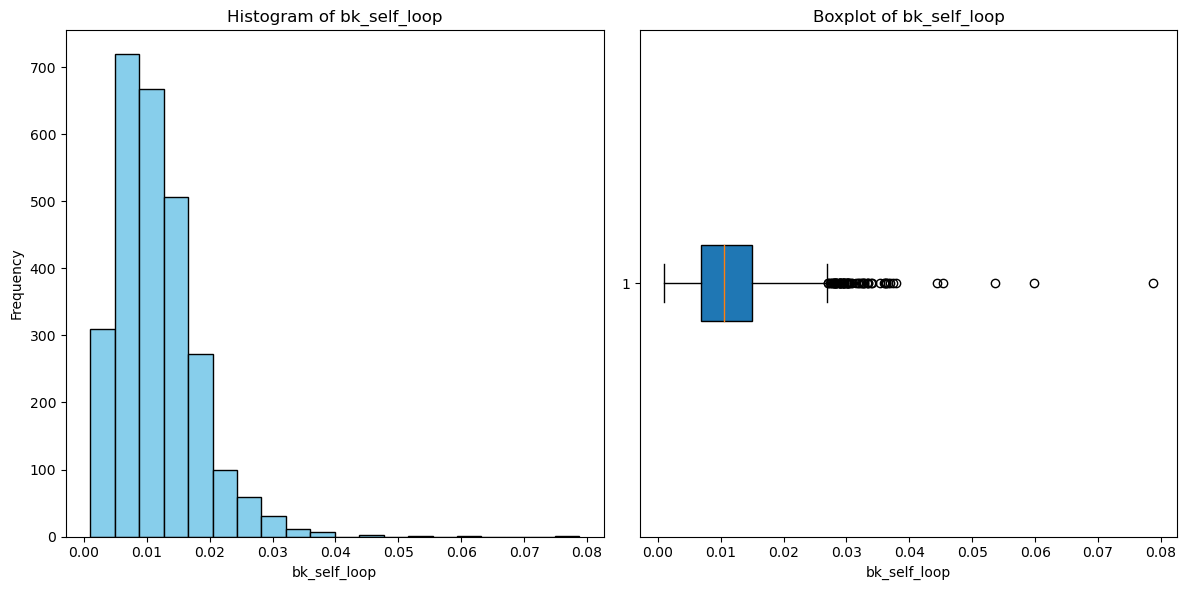

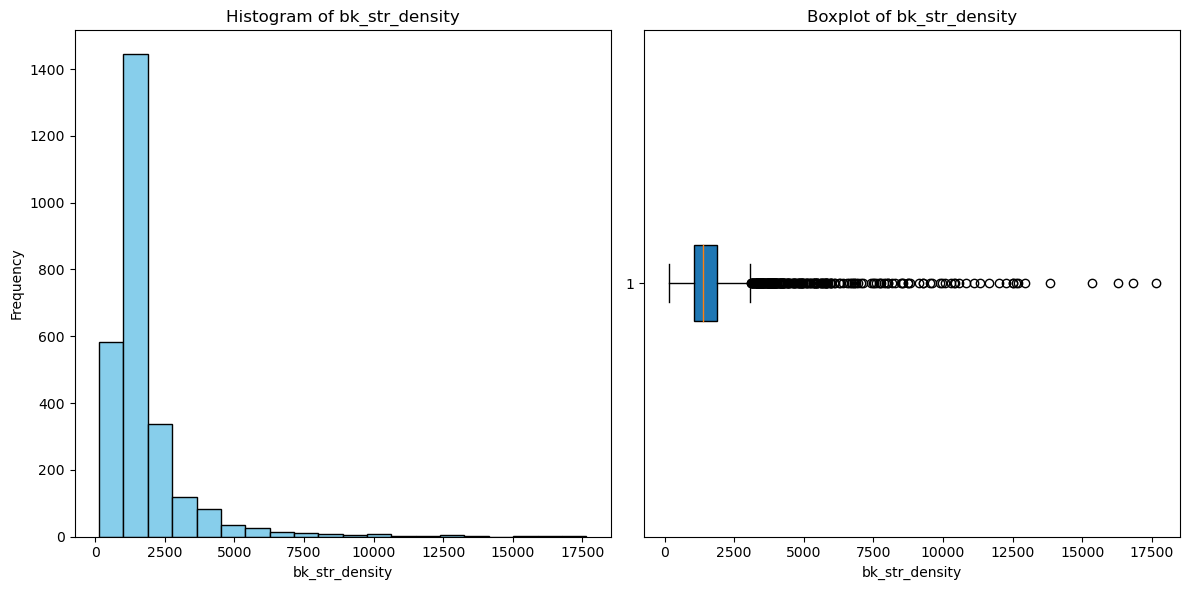

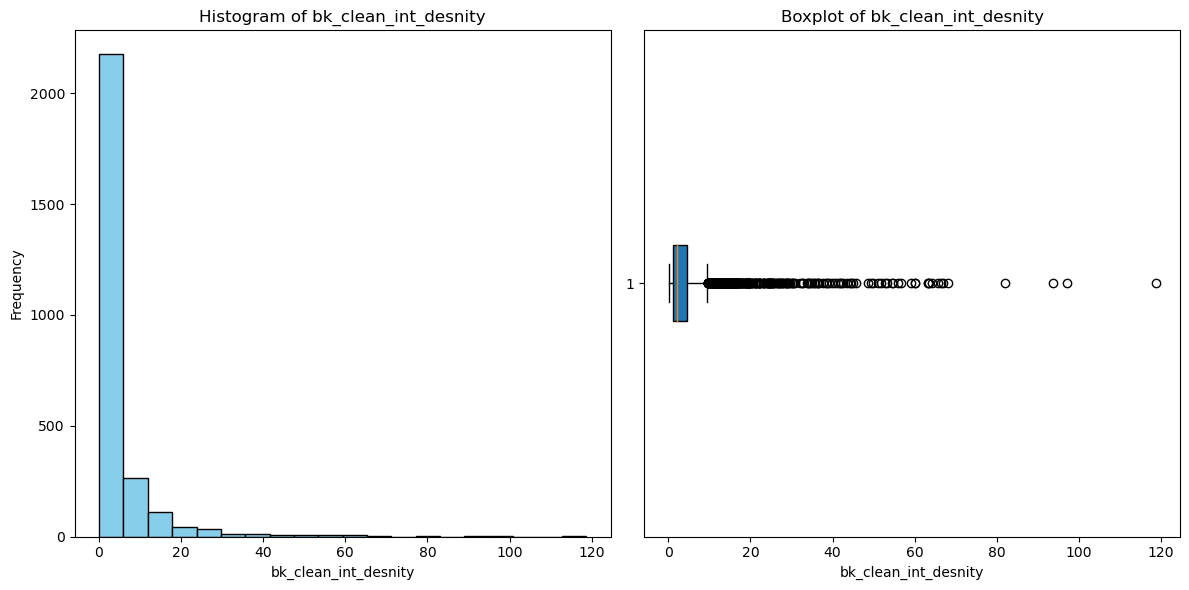

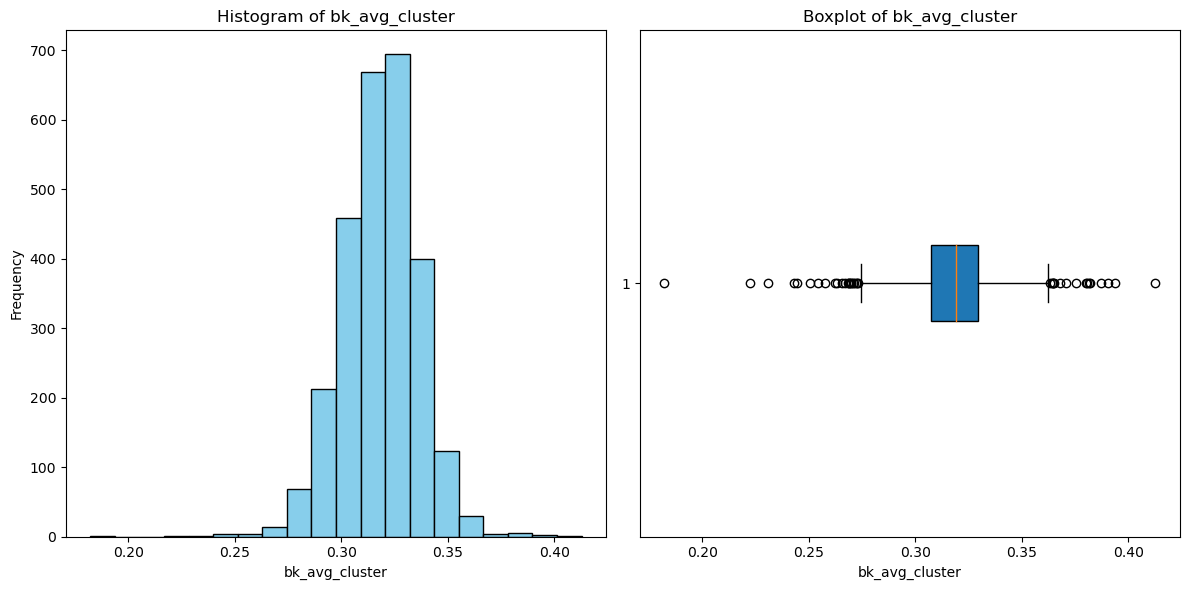

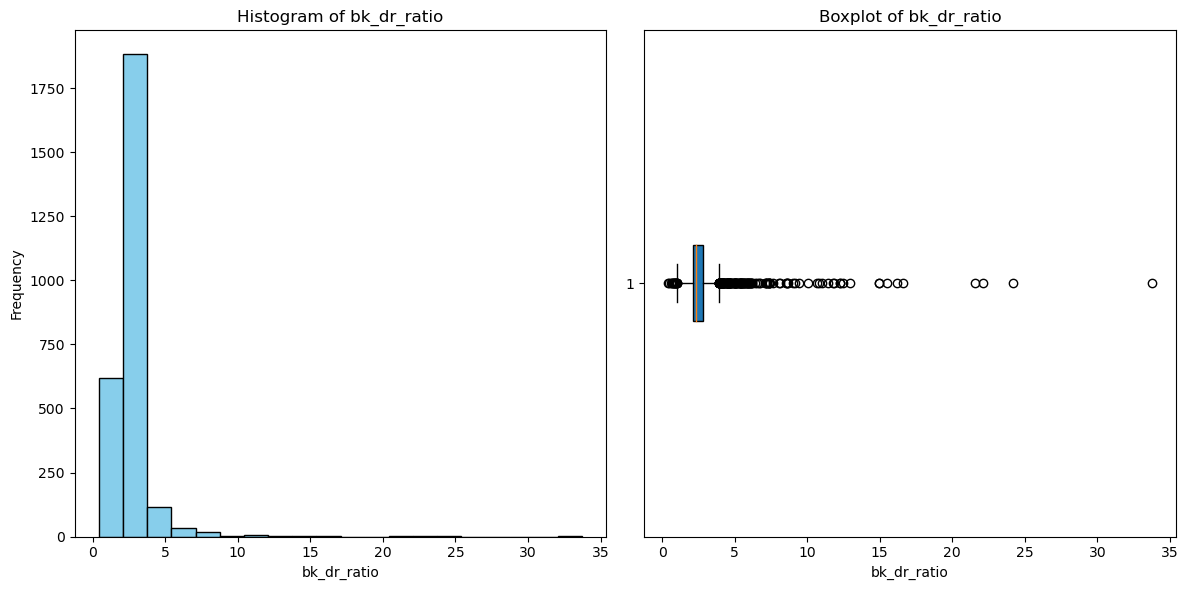

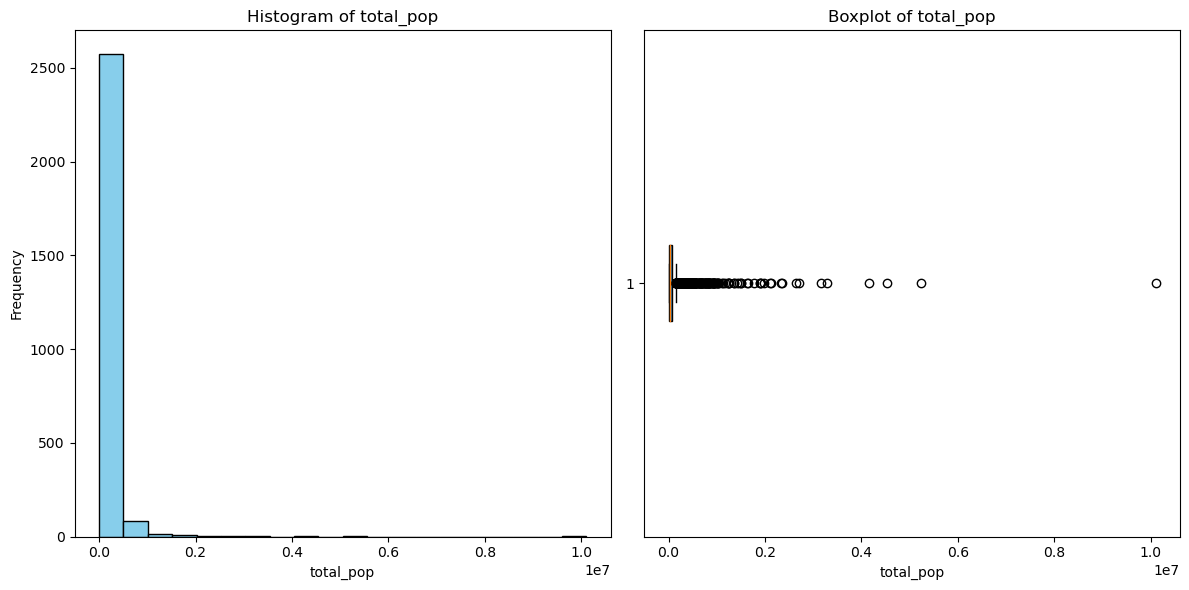

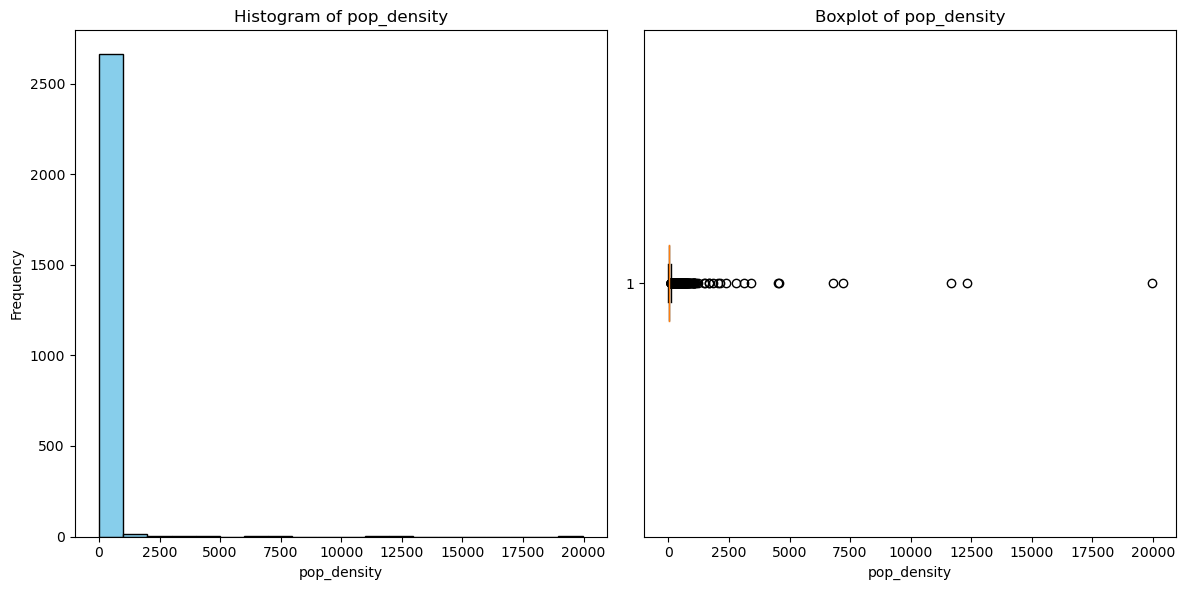

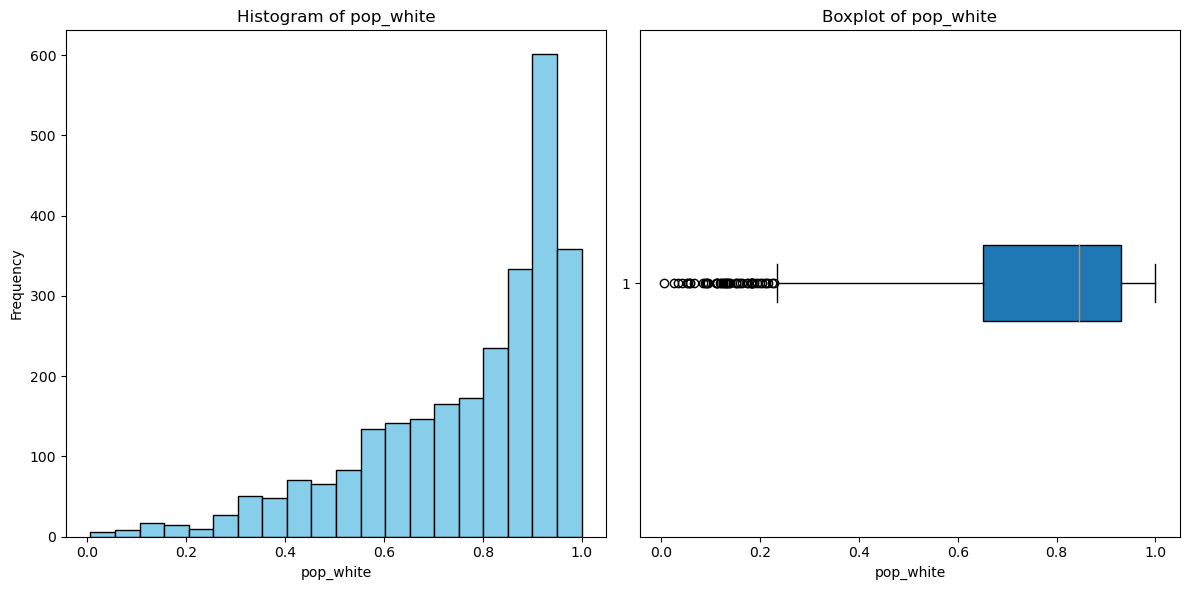

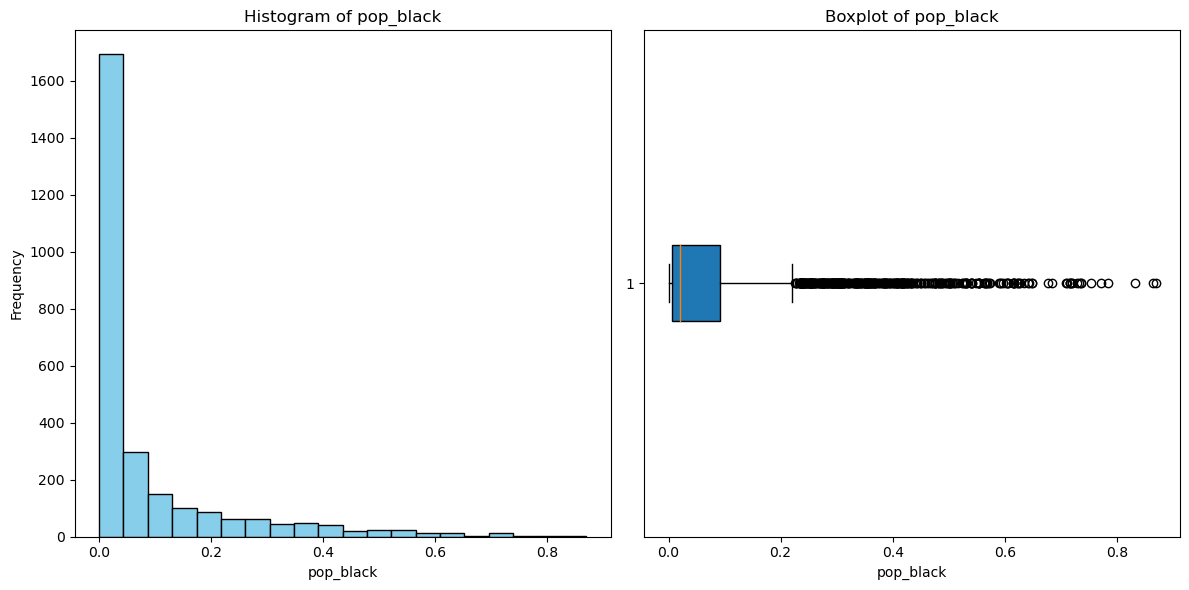

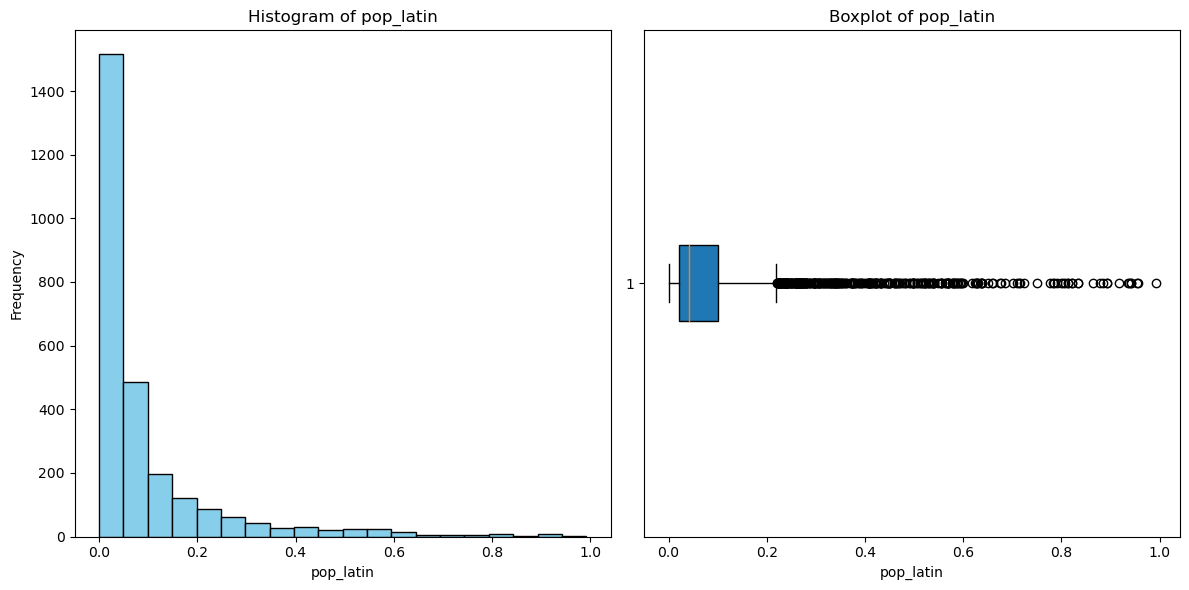

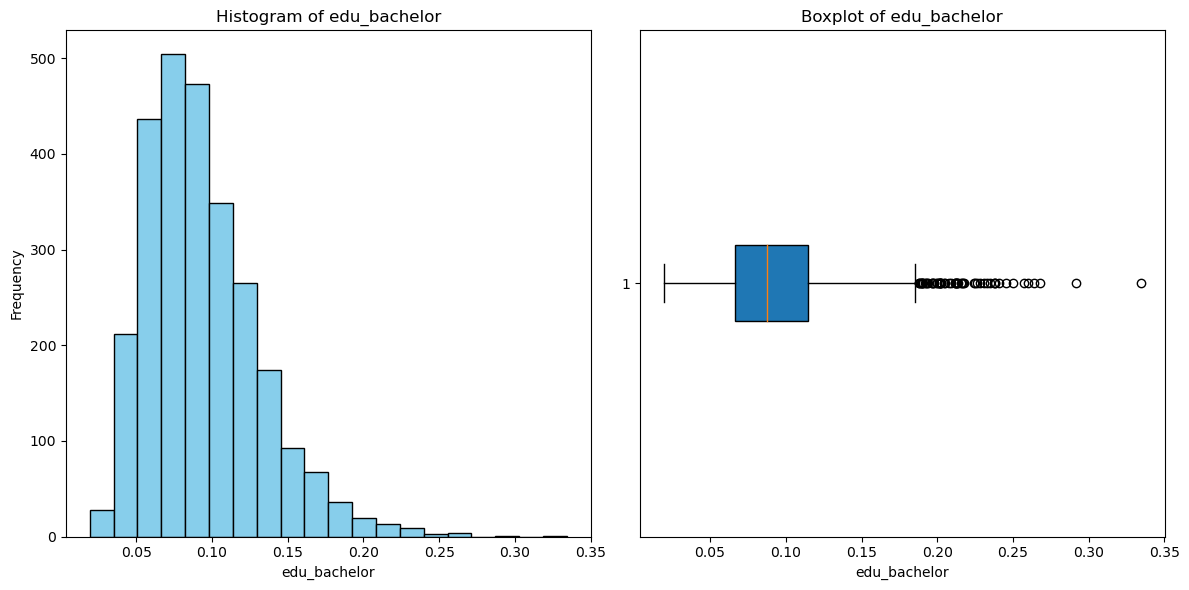

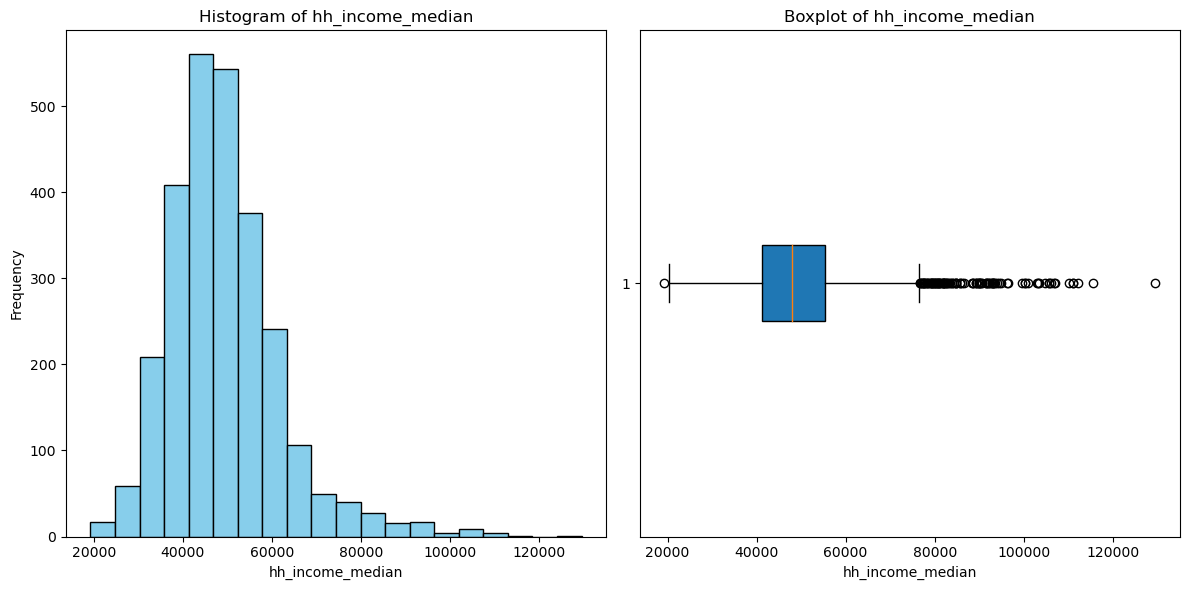

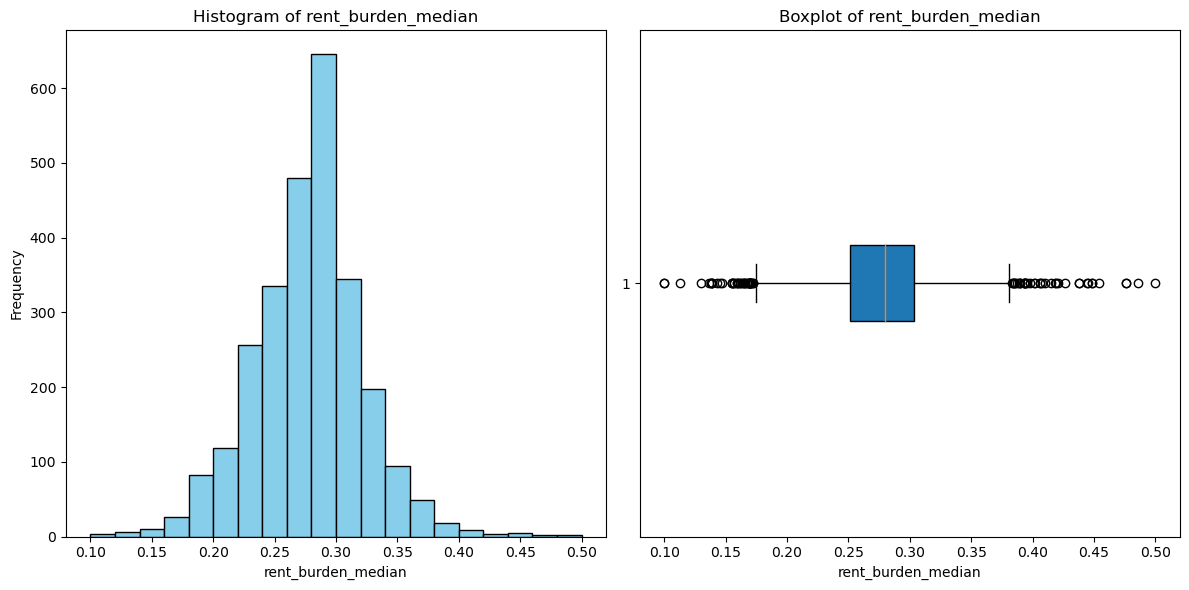

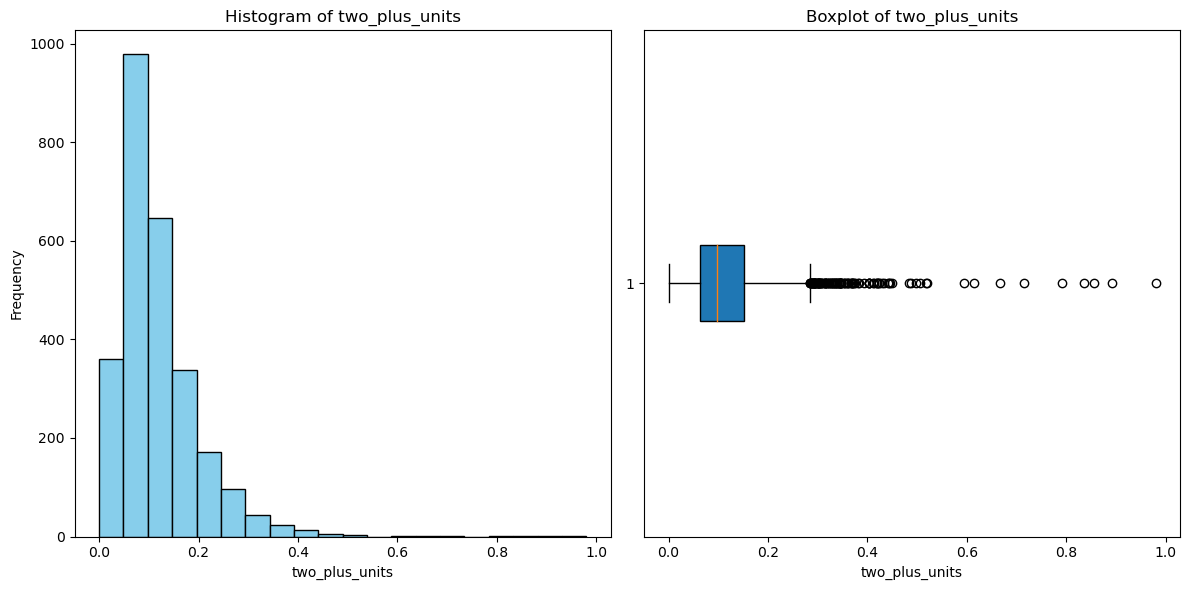

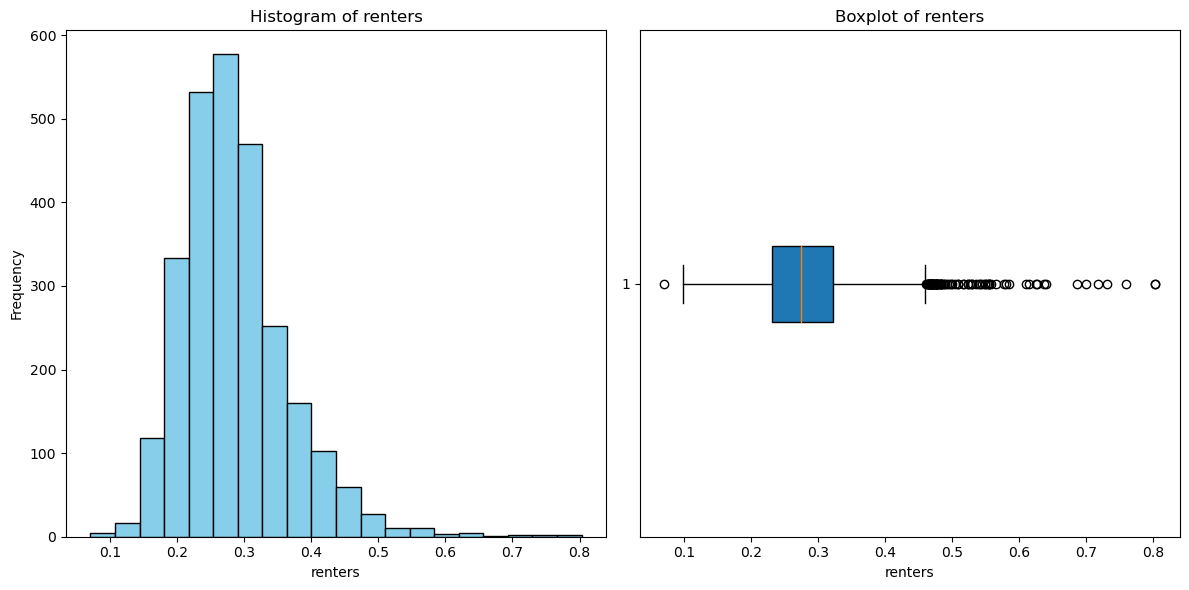

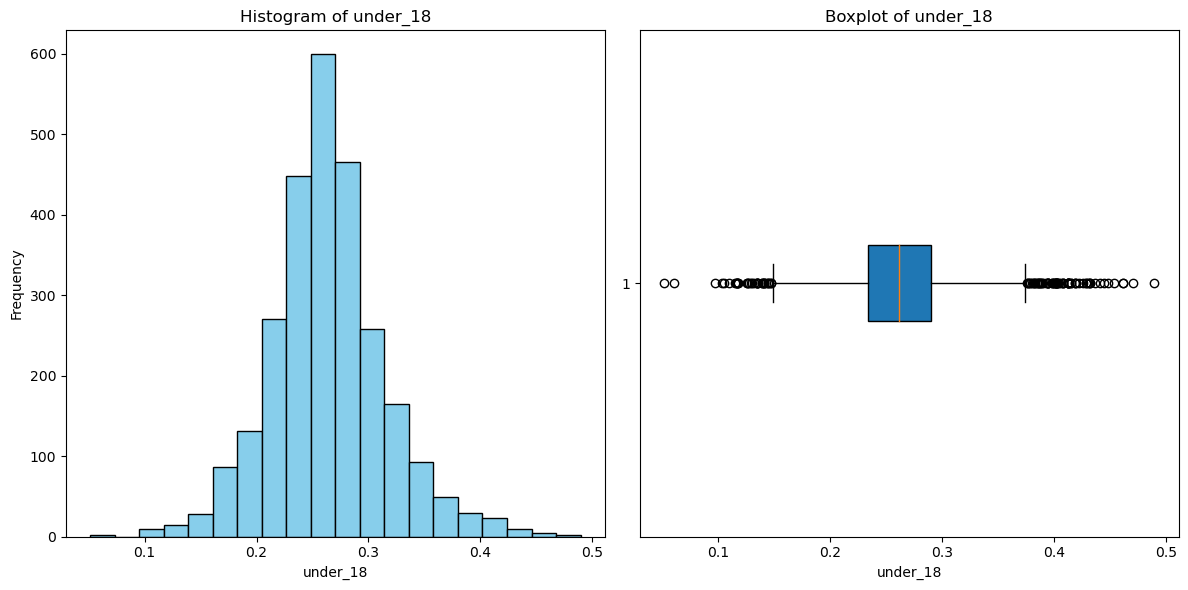

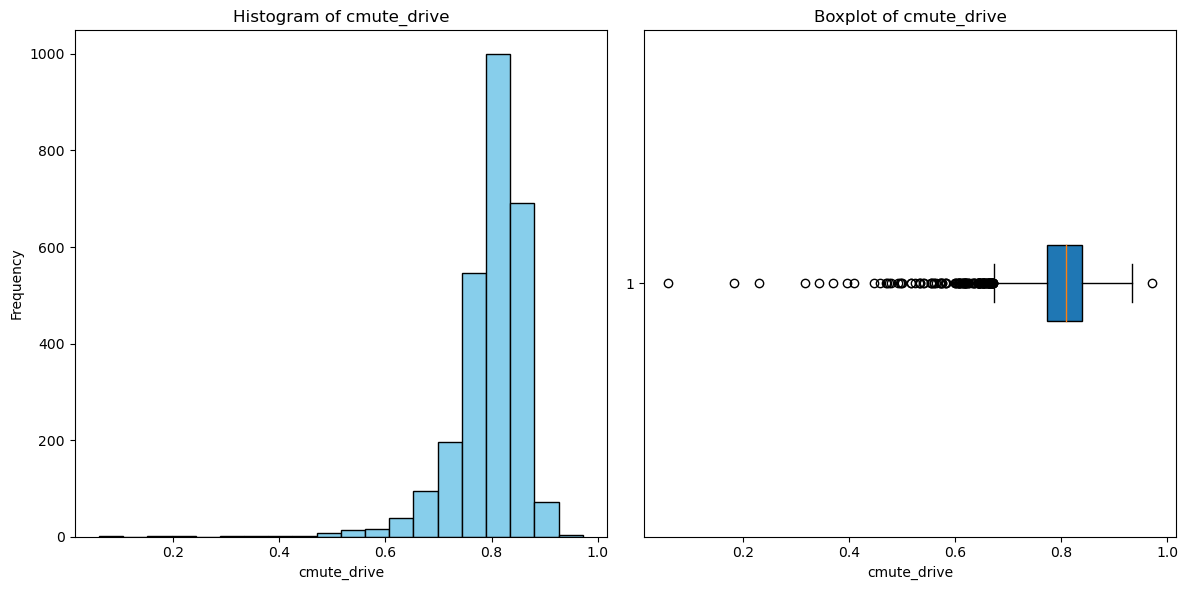

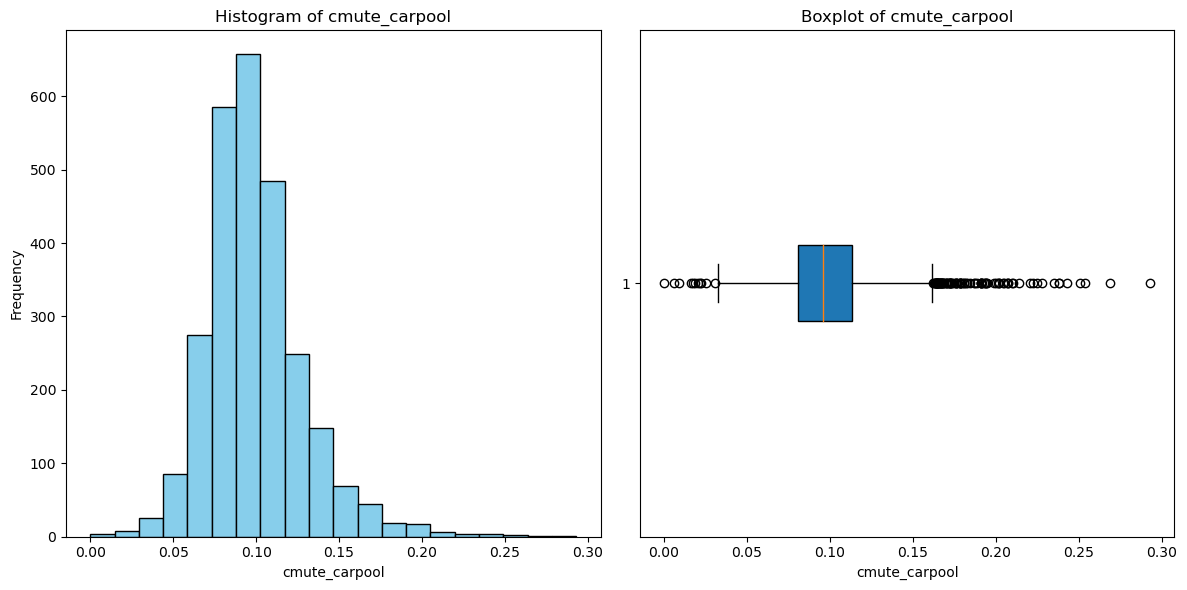

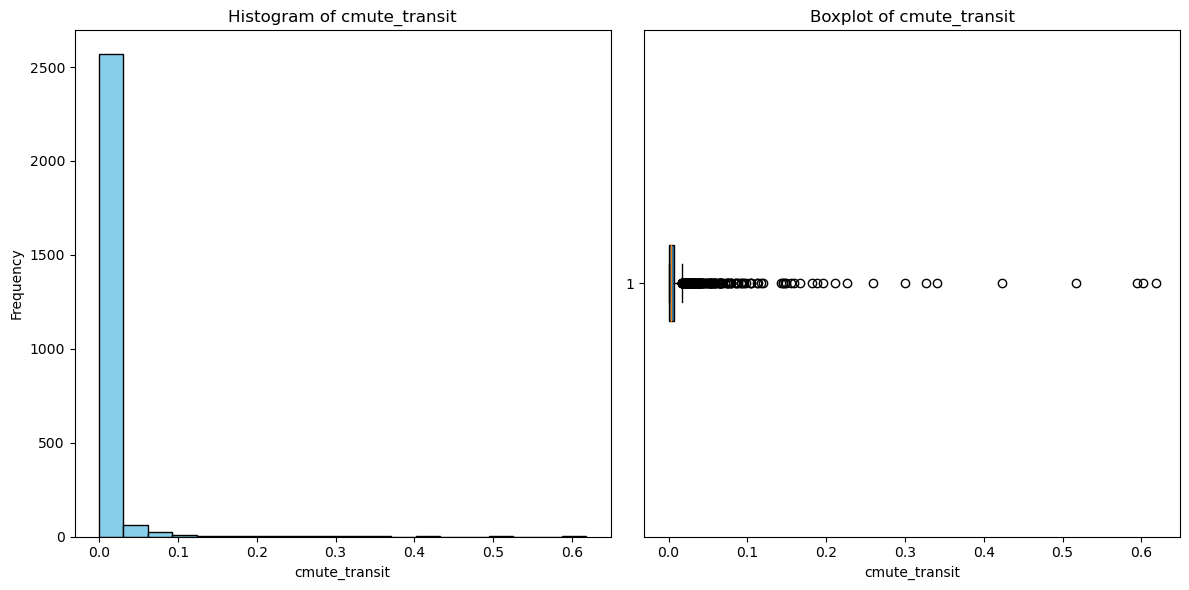

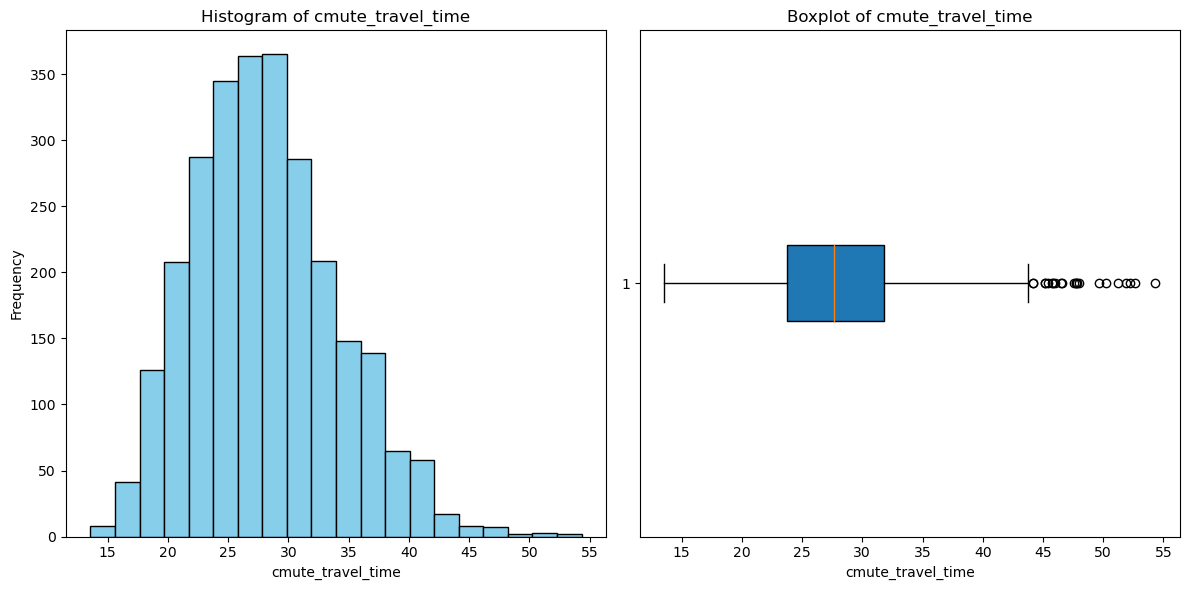

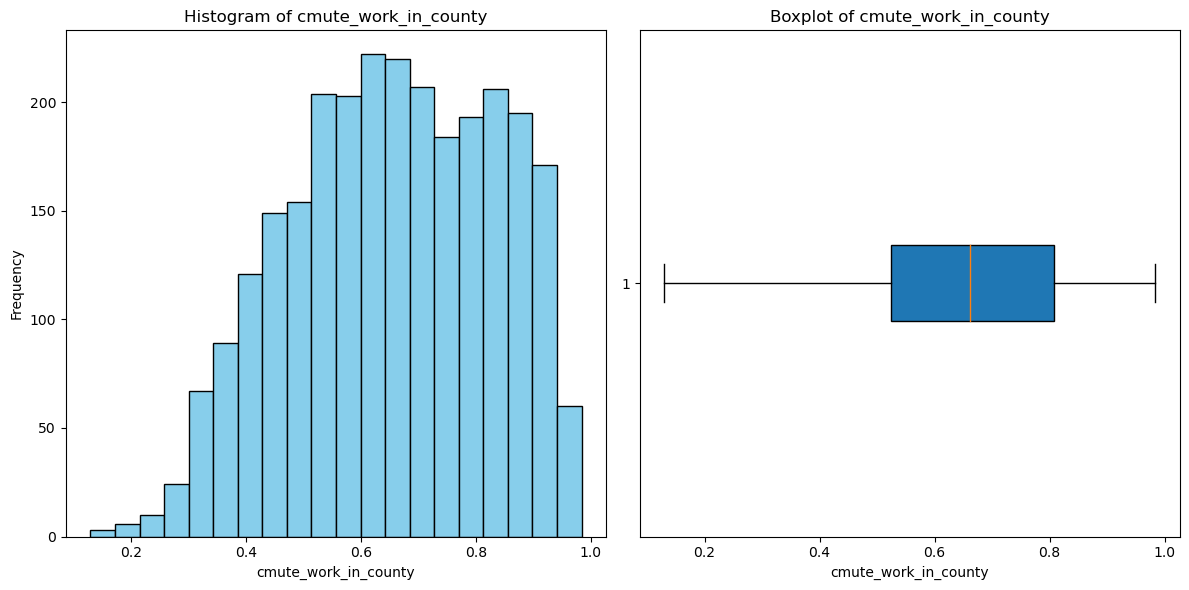

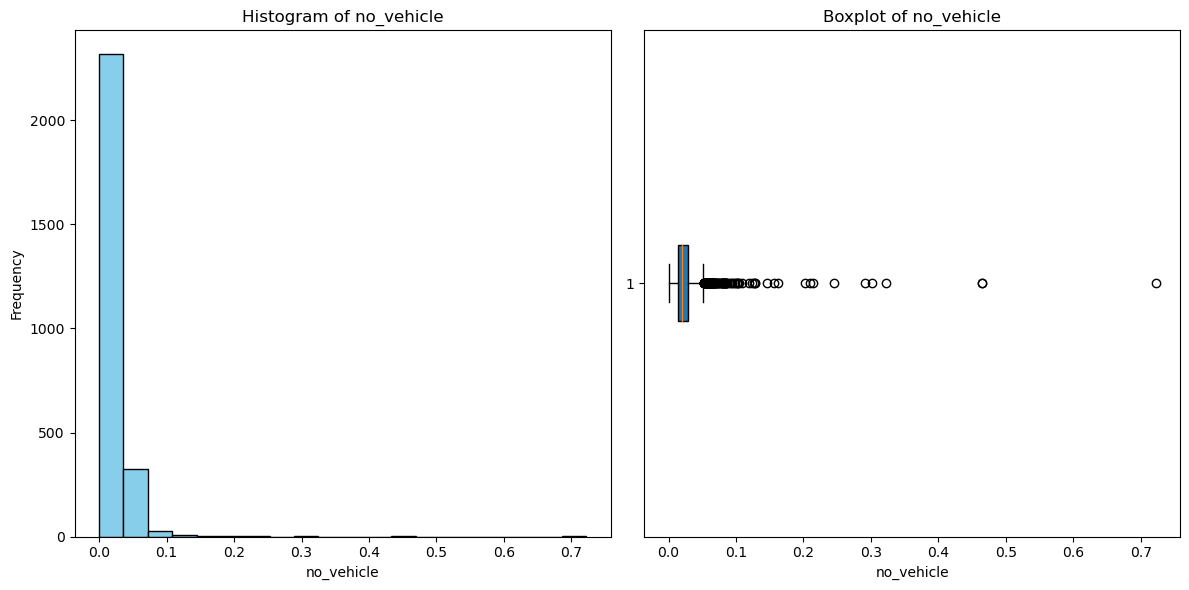

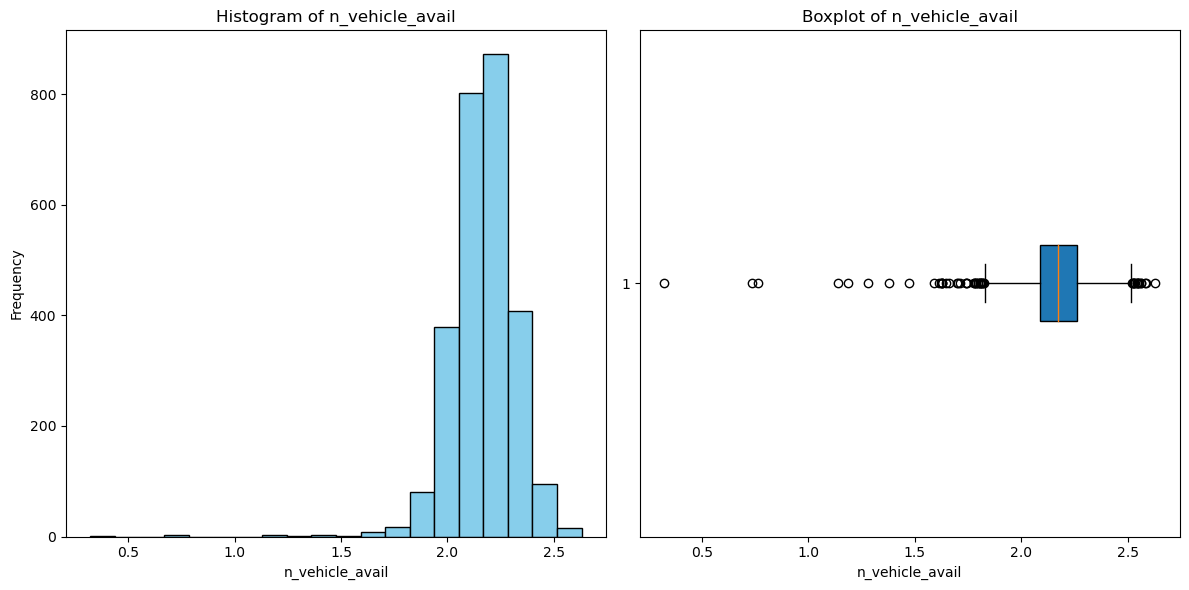

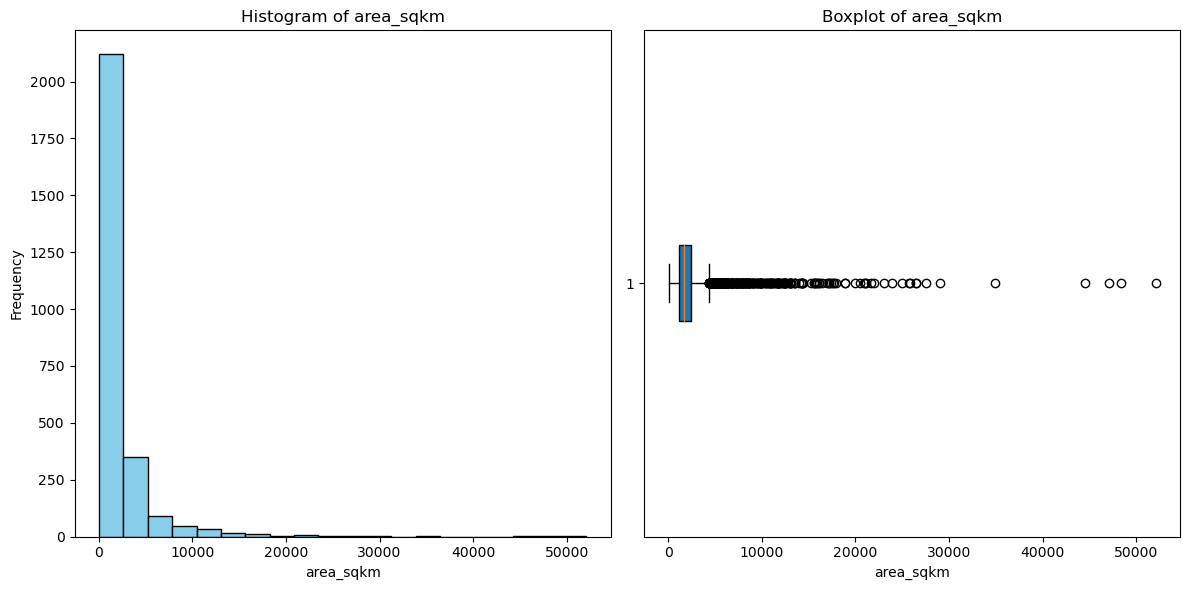

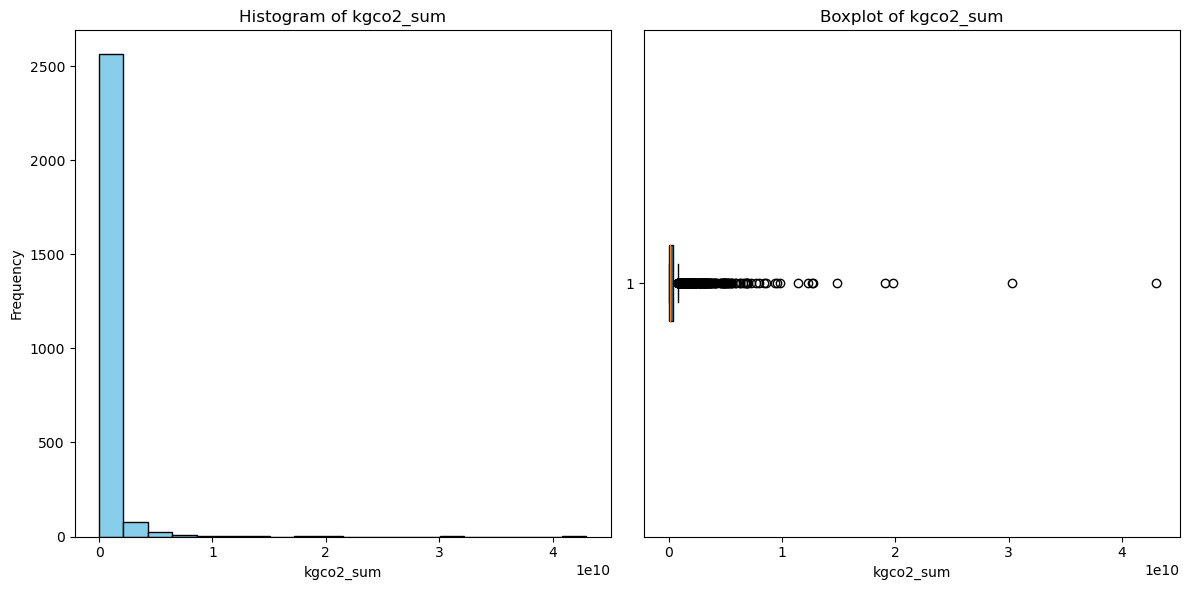

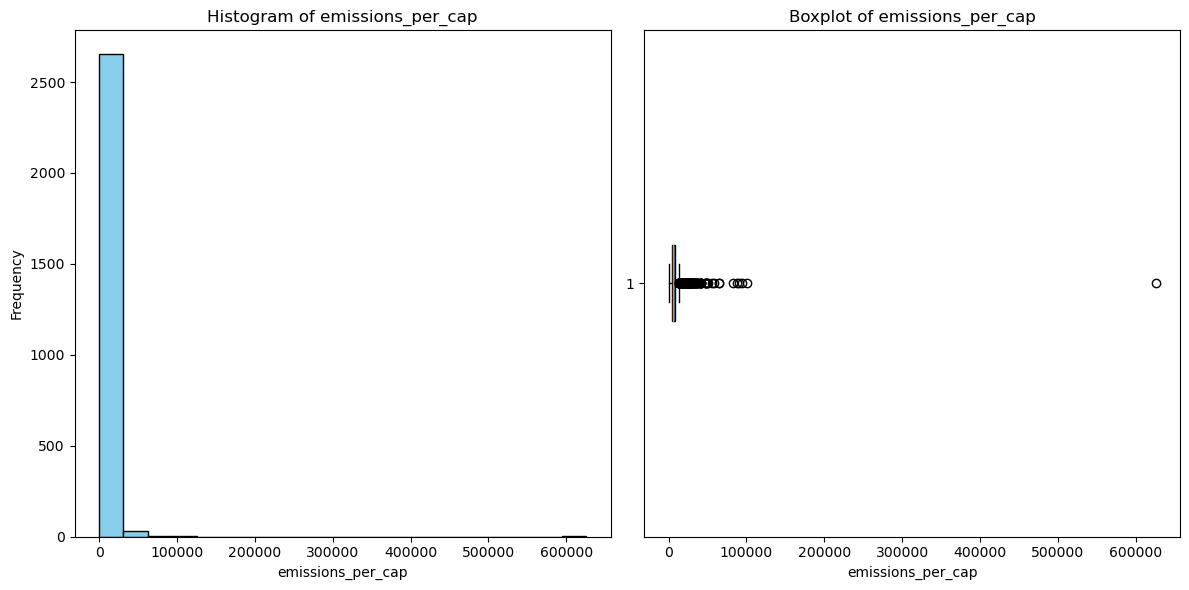

In [10]:
for col in master_wo_code.columns:
    plot_histogram_and_boxplot(master_df, col)

Due to the varying levels of skew which can be seen in the visualizations about, we use this pipeline to apply the appropriate scaling mechanism to each column. This is not perfect and the hyperparameters (the thresholds for outliers and skewness) should be investigated as part of future works

In [11]:
def scale_dataframe(df):
    scaled_df = pd.DataFrame()
    scaling_mechanisms = {}

    for column in df.columns:

        column_data = df[column]

        # Check for large values
        large_value_count = (column_data > 10000).sum()  # Adjust threshold as necessary

        # Check for significant number of outliers
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        outlier_count = ((column_data < (q1 - 1.5 * iqr)) | (column_data > (q3 + 1.5 * iqr))).sum()
        log = False

        # Decide on the scaling mechanism

        if column_data.max() <= 1 and column_data.min() >= 0:
            column_data = column_data
            scaling_mechanism = 'Already Scaled'
        elif large_value_count > 0:
            # Apply log transformation, ensuring no non-positive values
            column_data = np.log1p(np.maximum(column_data, 0))
            log = True
            scaling_mechanism = 'MinMaxScaler'
        # elif abs(skew(column_data)) < 0.5 and outlier_count < len(column_data) * 0.05:
        #     scaler = StandardScaler()
        #     scaling_mechanism = 'StandardScaler'
        # elif outlier_count >= len(column_data) * 0.05:
        #     scaler = RobustScaler()
        #     scaling_mechanism = 'RobustScaler'
        else:
            scaler = MinMaxScaler()
            scaling_mechanism = 'MinMaxScaler'

        # Scale the column
        if scaling_mechanism in ['StandardScaler', 'RobustScaler', 'MinMaxScaler']:
            scaled_column = scaler.fit_transform(column_data.values.reshape(-1, 1))
            scaled_df[column] = pd.Series(scaled_column.flatten(), index=column_data.index)
        else:
            scaled_df[column] = column_data

        if log:
            scaling_mechanisms[column] = 'Log Transform + ' + scaling_mechanism
        else:
            scaling_mechanisms[column] = scaling_mechanism

    return scaled_df, scaling_mechanisms


In [12]:
scaled_master, scaling_choices = scale_dataframe(master_wo_code)

In [13]:
scaled_master.head()

,dr_str_per_node,dr_circuity,dr_self_loop,dr_str_density,dr_clean_int_density,dr_avg_cluster,bk_str_per_node,bk_circuity,bk_self_loop,bk_str_density,...,cmute_drive,cmute_carpool,cmute_transit,cmute_travel_time,cmute_work_in_county,no_vehicle,n_vehicle_avail,area_sqkm,kgco2_sum,emissions_per_cap
6,0.188831,0.248277,0.040537,0.680720,0.074380,0.169369,0.178165,0.225253,0.035978,0.571085,...,0.794282,0.083578,0.001173,0.690201,0.292,0.023,0.884435,0.371768,0.677959,0.678314
10,0.558550,0.170034,0.013401,0.924039,0.611106,0.153212,0.652269,0.189574,0.010030,0.970944,...,0.715189,0.090972,0.044145,0.472878,0.387,0.039,0.647436,0.000000,0.710021,0.671190
13,0.339566,0.172252,0.017620,0.773145,0.187042,0.155745,0.438676,0.199715,0.013581,0.761912,...,0.753182,0.123106,0.052618,0.838737,0.378,0.014,0.842651,0.458741,0.832058,0.628502
19,0.254117,0.190042,0.018887,0.556346,0.039839,0.167390,0.315031,0.178621,0.012514,0.424102,...,0.800275,0.105643,0.004697,0.307077,0.792,0.042,0.749889,0.524657,0.698482,0.643754
20,0.336563,0.146430,0.004789,0.613281,0.041631,0.156235,0.220601,0.156431,0.017884,0.581002,...,0.826335,0.103580,0.014128,0.713865,0.463,0.021,0.879754,0.377670,0.671921,0.626377


### Print Mechanism Selected

In [14]:
for col_name, scale_mech in scaling_choices.items():
    print(f"For column {col_name}, the pipeline used the {scale_mech} method")

For column dr_str_per_node, the pipeline used the MinMaxScaler method
For column dr_circuity, the pipeline used the MinMaxScaler method
For column dr_self_loop, the pipeline used the Already Scaled method
For column dr_str_density, the pipeline used the Log Transform + MinMaxScaler method
For column dr_clean_int_density, the pipeline used the MinMaxScaler method
For column dr_avg_cluster, the pipeline used the Already Scaled method
For column bk_str_per_node, the pipeline used the MinMaxScaler method
For column bk_circuity, the pipeline used the MinMaxScaler method
For column bk_self_loop, the pipeline used the Already Scaled method
For column bk_str_density, the pipeline used the Log Transform + MinMaxScaler method
For column bk_clean_int_desnity, the pipeline used the MinMaxScaler method
For column bk_avg_cluster, the pipeline used the Already Scaled method
For column bk_dr_ratio, the pipeline used the MinMaxScaler method
For column total_pop, the pipeline used the Log Transform + Mi

### Add FIPS5 Back and Export Scaled Data

In [15]:
scaled_master['fips5'] = master_df['fips5']
scaled_master.to_csv('scaled_df.csv', index=False)